#RAG: Retrieval Augmented Generation

##BASIC RAG PIPELINE
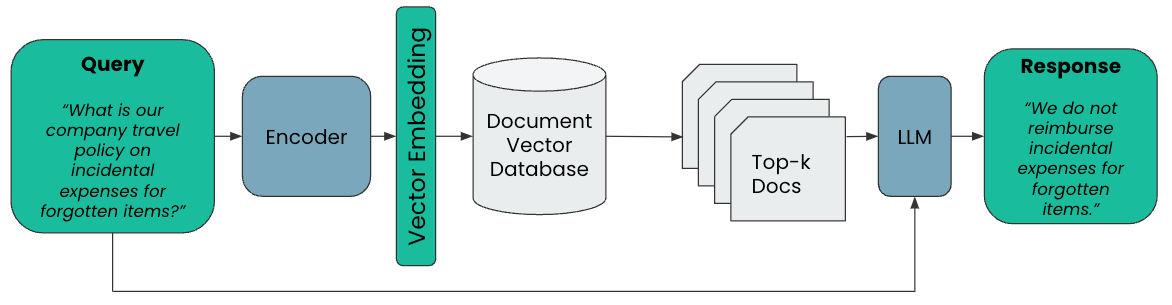

## Ingestion

---
  - It is first step of RAG pipeline.
  - The process will be following


Document ➡️Chunking ➡️ Embedding ➡️Indexing


### Loading Documents

---
- We load document which contains additional information which needs to added to the LLM
- For simplicity we are directly taking text here. We can also take PDFs, HTMLs, Markdown files also.

In [ ]:
text ="""The giraffe is a large African hoofed mammal belonging to the genus Giraffa. It is the tallest living terrestrial animal and the largest ruminant on Earth. Traditionally, giraffes have been thought of as one species, Giraffa camelopardalis, with nine subspecies. Most recently, researchers proposed dividing them into four extant species due to new research into their mitochondrial and nuclear DNA, and individual species can be distinguished by their fur coat patterns. Seven other extinct species of Giraffa are known from the fossil record.
The giraffe's chief distinguishing characteristics are its extremely long neck and legs, its horn-like ossicones, and its spotted coat patterns.
It is classified under the family Giraffidae, along with its closest extant relative, the okapi. Its scattered range extends from Chad in the north to South Africa in the south, and from Niger in the west to Somalia in the east.
Giraffes usually inhabit savannahs and woodlands. Their food source is leaves, fruits, and flowers of woody plants, primarily acacia species, which they browse at heights most other herbivores cannot reach.
Lions, leopards, spotted hyenas, and African wild dogs may prey upon giraffes. Giraffes live in herds of related females and their offspring or bachelor herds of unrelated adult males, but are gregarious and may gather in large aggregations. Males establish social hierarchies through "necking", combat bouts where the neck is used as a weapon. Dominant males gain mating access to females, which bear sole responsibility for rearing the young."""

In [ ]:
#-->if documents are in text format
#with open('sample_doc.txt', 'r') as file:
    #text = file.open(documents)

💡 PDFs, HTMLs etc. can be loaded using various python libraries. Langchain integrates all these libraries at one place.

### Chunking

---

We can split text on the basis of characters or other criterion. Here we will chunk them on the basis of new line.

In [ ]:
text.split('\n')

['The giraffe is a large African hoofed mammal belonging to the genus Giraffa. It is the tallest living terrestrial animal and the largest ruminant on Earth. Traditionally, giraffes have been thought of as one species, Giraffa camelopardalis, with nine subspecies. Most recently, researchers proposed dividing them into four extant species due to new research into their mitochondrial and nuclear DNA, and individual species can be distinguished by their fur coat patterns. Seven other extinct species of Giraffa are known from the fossil record.',
 "The giraffe's chief distinguishing characteristics are its extremely long neck and legs, its horn-like ossicones, and its spotted coat patterns.",
 'It is classified under the family Giraffidae, along with its closest extant relative, the okapi. Its scattered range extends from Chad in the north to South Africa in the south, and from Niger in the west to Somalia in the east.',
 'Giraffes usually inhabit savannahs and woodlands. Their food source

In [ ]:
chunk_text = text.split('\n')

In [ ]:
##we can also do it with a powerful nlp library spacy
#!pip install spacy
#import spacy

#nlp = spacy.load('en_core_web_sm')
#doc = nlp(text)
#chunk_text = list(doc.sents)

In [ ]:
# we want to id a id to each chunk, it will be used later at the time of indexing.
def assign_ids_to_chunks(chunks):
    return {f"id_{i}": chunk for i, chunk in enumerate(chunks)}

In [ ]:
id_chunk_dict = assign_ids_to_chunks(chunk_text)

In [ ]:
sentences = list(id_chunk_dict.values())

In [ ]:
ids = list(id_chunk_dict.keys())

💡 As mentioned in slide, there are multiple techniques to split the texts.
Langchain is frameworke which simplifies the working with LLMs.It supports many text splitters.
- `langchain_text_splitters` module has `CharacterTextSplitter` and ` RecursiveCharacterTextSplitter` functions.

https://colab.research.google.com/

### Embeddings

---

- In this step we will convert chunks to the real valued vectors called embeddings.

- We can used pretrained models, saved in the huggingface for this task.

- Sentence transformer is such a module which lets us access SOTA embedding models.

In [ ]:
!pip install sentence_transformers -q #install sentence transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 56.0 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer
# Load a pretrained Sentence Transformer model, here we are using  all-MiniLM-L6-v2 , any other model can also be chosen from this library
model = SentenceTransformer("all-MiniLM-L6-v2")

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
embeddings = model.encode(chunk_text)

In [ ]:
len(chunk_text)

5

In [ ]:
embeddings.shape

(5, 384)

In [ ]:
#we have converted 5 senteces to 5x384 dimensional matrix. we can search in this

💡 Alternatively we can call Huggingface embeddings from langchain.
- we can use module `langchain_community.embeddings` to import `HuggingFaceEmbeddings` function

https://colab.research.google.com/drive/1vHQo71yYzflx7KDBqcUChpcbQ_r6XEsu#scrollTo=NdDFp8EC4c1Q

### Indexing

- For fast search and retrieval, we save these embedding to vector databases.
- There are many choices here, many of them are discussed in slides.
- Here we will used chroma, it is open source and easy to work with

In [ ]:
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.5/559.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 9.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4

In [ ]:
import chromadb
chroma_client = chromadb.Client()

In [ ]:
# switch `create_collection` to `get_or_create_collection` to avoid creating a new collection every time
collection = chroma_client.get_or_create_collection(name="my_collection")

In [ ]:
#add files to 'my_collection'
# switch `add` to `upsert` to avoid adding the same documents every time
collection.upsert(
    documents=sentences,
    ids=ids,
    embeddings=embeddings #
)

💡 Chroma is available in langchain also. `langchain_chroma` module can be used

## Retrieval

---

In this part we will search a query in vector database and it will return us the similar documents

In [ ]:
results = collection.query(
    query_texts=["subspecies of giraffes"],
    n_results=2 # how many results to return
)
print(results['documents'])

[['The giraffe is a large African hoofed mammal belonging to the genus Giraffa. It is the tallest living terrestrial animal and the largest ruminant on Earth. Traditionally, giraffes have been thought of as one species, Giraffa camelopardalis, with nine subspecies. Most recently, researchers proposed dividing them into four extant species due to new research into their mitochondrial and nuclear DNA, and individual species can be distinguished by their fur coat patterns. Seven other extinct species of Giraffa are known from the fossil record.', "The giraffe's chief distinguishing characteristics are its extremely long neck and legs, its horn-like ossicones, and its spotted coat patterns."]]


In [ ]:
id_chunk_dict['id_0']

'The giraffe is a large African hoofed mammal belonging to the genus Giraffa. It is the tallest living terrestrial animal and the largest ruminant on Earth. Traditionally, giraffes have been thought of as one species, Giraffa camelopardalis, with nine subspecies. Most recently, researchers proposed dividing them into four extant species due to new research into their mitochondrial and nuclear DNA, and individual species can be distinguished by their fur coat patterns. Seven other extinct species of Giraffa are known from the fossil record.'

In [ ]:
results

{'ids': [['id_0', 'id_1']],
 'distances': [[0.4254404604434967, 0.7014344334602356]],
 'metadatas': [[None, None]],
 'embeddings': None,
 'documents': [['The giraffe is a large African hoofed mammal belonging to the genus Giraffa. It is the tallest living terrestrial animal and the largest ruminant on Earth. Traditionally, giraffes have been thought of as one species, Giraffa camelopardalis, with nine subspecies. Most recently, researchers proposed dividing them into four extant species due to new research into their mitochondrial and nuclear DNA, and individual species can be distinguished by their fur coat patterns. Seven other extinct species of Giraffa are known from the fossil record.',
   "The giraffe's chief distinguishing characteristics are its extremely long neck and legs, its horn-like ossicones, and its spotted coat patterns."]],
 'uris': None,
 'data': None,
 'included': ['metadatas', 'documents', 'distances']}

In [ ]:
results['ids']

[['id_0', 'id_1']]

## Response Generation

In [ ]:
base_prompt = """You are an AI assistant. Your task is to understand the user question, and provide an answer using the provided contexts.
If the provided context does not contain the answer, simply state, "The provided context does not have the answer."

User question: {}

Contexts:
{}
"""

In [ ]:
k = 2 # how many results to return
question = 'What is genus of Giraffe?'

results = collection.query(
    query_texts=[question],
    n_results=k # how many results to return
)
indices = results['ids'] # indices of top k results


In [ ]:
# based on the top-k indices, we will acccess these sentences from the id_chunk_dict, where sentences with unique ids are saved.
context = '\n'.join([f'{i}. {id_chunk_dict[index]}' for i, index in enumerate(indices[0])])
print(context)

0. The giraffe is a large African hoofed mammal belonging to the genus Giraffa. It is the tallest living terrestrial animal and the largest ruminant on Earth. Traditionally, giraffes have been thought of as one species, Giraffa camelopardalis, with nine subspecies. Most recently, researchers proposed dividing them into four extant species due to new research into their mitochondrial and nuclear DNA, and individual species can be distinguished by their fur coat patterns. Seven other extinct species of Giraffa are known from the fossil record.
1. The giraffe's chief distinguishing characteristics are its extremely long neck and legs, its horn-like ossicones, and its spotted coat patterns.


In [ ]:
#this will be augmented(query + retreived documents) that will be fetched to LLM
prompt = f'{base_prompt.format(question, context)}'
print(prompt)

You are an AI assistant. Your task is to understand the user question, and provide an answer using the provided contexts. 
If the provided context does not contain the answer, simply state, "The provided context does not have the answer."

User question: What is genus of Giraffe

Contexts:
0. The giraffe is a large African hoofed mammal belonging to the genus Giraffa. It is the tallest living terrestrial animal and the largest ruminant on Earth. Traditionally, giraffes have been thought of as one species, Giraffa camelopardalis, with nine subspecies. Most recently, researchers proposed dividing them into four extant species due to new research into their mitochondrial and nuclear DNA, and individual species can be distinguished by their fur coat patterns. Seven other extinct species of Giraffa are known from the fossil record.
1. The giraffe's chief distinguishing characteristics are its extremely long neck and legs, its horn-like ossicones, and its spotted coat patterns.



### LLM

---

- Here we can different LLM APIs like Gemini, GPT etc.
- We will be using groq here, which is a LLM inference engine and free to use right now.

In [ ]:
!pip install groq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 3.5 MB/s eta 0:00:00


In [ ]:
from groq import Groq
# setting up Groq
client = Groq(
    api_key=""
)

In [ ]:
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": prompt,
        }
    ],
    model="llama3-8b-8192", #list of model it supports - https://console.groq.com/docs/models
    temperature = 0.3, # high temprature means high creativity and randomness in answers
)

print(chat_completion.choices[0].message.content)

Based on the provided contexts, the genus of the giraffe is Giraffa. Specifically, it is stated in context 0 that "The giraffe is a large African hoofed mammal belonging to the genus Giraffa."


## Youtube transcript loader

In [ ]:
!pip install youtube-transcript-api

In [ ]:
from youtube_transcript_api import YouTubeTranscriptApi
video_link = 'wwhTfyX9J34' #enter video id, the part after 'v='. e.g. - https://www.youtube.com/watch?v=wwhTfyX9J34&t=6267s
script_json = YouTubeTranscriptApi.get_transcript(video_link)

In [ ]:
script_json[0]

{'text': '- So you have an original life event.',
 'start': 0.12,
 'duration': 1.71}

In [ ]:
text = ''
for i in script_json:
  text += i['text']

In [ ]:
print(text)

- So you have an original life event.It evolves for 4 billion
years, at least on our planet.It evolves a technosphere.The technologies themselvesstart having this property we call life,which is the phase we're undergoing now.It solves the origin of itself,and then it figures out
how that process all works,understands how to make more lifeand then can copy itself
onto another planet,so the whole structure
can reproduce itself.- The following is a
conversation with Sara Walker,her third time in this podcast.She is an astrobiologist
and theoretical physicist,interested in the origin of lifeand in discovering alien
life on other worlds.She has written an amazing
new upcoming book titled,"Life as No One Knows It: The
Physics of Life's Emergence."This book is coming out on August 6th,so please go pre-order it now.It will blow your mind.This is a Lex Fridman podcast,to support it,please check out our
sponsors in the description.And now, dear friends, here's Sara Walker.You open the book, "Lif